In [1]:
from itertools import islice

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

import pandas as pd
from sklearn.manifold import TSNE

In [3]:
from gluonts.dataset.repository.datasets import get_dataset
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from gluonts.torch.modules.distribution_output import NegativeBinomialOutput

from pts.dataset.repository.datasets import dataset_recipes

from pytorch_lightning.loggers import CSVLogger

from vq_ar import VQVAEEstimator

In [5]:
dataset = get_dataset("taxi_30min")

In [6]:
estimator = VQVAEEstimator(
        freq=dataset.metadata.freq,
        prediction_length=dataset.metadata.prediction_length,
        context_length=dataset.metadata.prediction_length*6,
        vq_embedding_dim=64,
        vq_num_embedding=128,
        vq_jitter_prob=None,
        scaling=True,
        batch_size=256,
        num_feat_static_cat=len(dataset.metadata.feat_static_cat),
        cardinality=[int(cat_feat_info.cardinality) for cat_feat_info in dataset.metadata.feat_static_cat],
        embedding_dimension=[8],
        num_batches_per_epoch=200,
        distr_output=NegativeBinomialOutput(),
        trainer_kwargs=dict(gpus="1", max_epochs=100, logger=CSVLogger(".", "lightning_logs/")),
    )

In [7]:
predictor = estimator.train(
        training_data=dataset.train,
        validation_data=dataset.test,
        shuffle_buffer_length=1024,
        num_workers=8,
    )

/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:321: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(string, freq=freq)
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:321: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(string, freq=freq)
GPU available: True, used: True
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:321: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(string, freq=freq)
TPU available: False, using: 0 TPU cores
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:321: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(string, freq=freq)
IPU available: False, using: 0 IPUs
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:

/home/kashif/gluon-ts-PR/src/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._min_time_point, self._max_time_point, freq=start.freq
/home/kashif/gluon-ts-PR/src/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._min_time_point, self._max_time_point, freq=start.freq
/home/kashif/gluon-ts-PR/src/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._min_time_point, self._max_time_point, freq=start.freq
/home/kashif/gluon-ts-PR/src/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._min_time_point, self._max_time_point, freq=start.freq
/home/kashif/gluon-ts-PR/src/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._min_time_

Validation sanity check: 0it [00:00, ?it/s]

/home/kashif/.env/pytorch/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:321: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(string, freq=freq)
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:324: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if isinstance(timestamp.freq, Tick):
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:326: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  timestamp.floor(timestamp.freq), timestamp.freq
/home/kashif/gluon-ts-PR/src/gl

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Epoch 0, global step 199: val_loss reached 2.44279 (best 2.44279), saving model to "./lightning_logs/version_36/checkpoints/epoch=0-step=199.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 1, global step 399: val_loss reached 2.39061 (best 2.39061), saving model to "./lightning_logs/version_36/checkpoints/epoch=1-step=399.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 2, global step 599: val_loss reached 2.37061 (best 2.37061), saving model to "./lightning_logs/version_36/checkpoints/epoch=2-step=599.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 3, global step 799: val_loss reached 2.36104 (best 2.36104), saving model to "./lightning_logs/version_36/checkpoints/epoch=3-step=799.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 4, global step 999: val_loss reached 2.36085 (best 2.36085), saving model to "./lightning_logs/version_36/checkpoints/epoch=4-step=999.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 5, global step 1199: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 6, global step 1399: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 7, global step 1599: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 8, global step 1799: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 9, global step 1999: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 10, global step 2199: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 11, global step 2399: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 12, global step 2599: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 13, global step 2799: val_loss reached 2.36029 (best 2.36029), saving model to "./lightning_logs/version_36/checkpoints/epoch=13-step=2799.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 14, global step 2999: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 15, global step 3199: val_loss reached 2.35501 (best 2.35501), saving model to "./lightning_logs/version_36/checkpoints/epoch=15-step=3199.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 16, global step 3399: val_loss reached 2.35409 (best 2.35409), saving model to "./lightning_logs/version_36/checkpoints/epoch=16-step=3399.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 17, global step 3599: val_loss reached 2.35146 (best 2.35146), saving model to "./lightning_logs/version_36/checkpoints/epoch=17-step=3599.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 18, global step 3799: val_loss reached 2.34656 (best 2.34656), saving model to "./lightning_logs/version_36/checkpoints/epoch=18-step=3799.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 19, global step 3999: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 20, global step 4199: val_loss reached 2.34582 (best 2.34582), saving model to "./lightning_logs/version_36/checkpoints/epoch=20-step=4199.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 21, global step 4399: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 22, global step 4599: val_loss reached 2.34240 (best 2.34240), saving model to "./lightning_logs/version_36/checkpoints/epoch=22-step=4599.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 23, global step 4799: val_loss reached 2.34158 (best 2.34158), saving model to "./lightning_logs/version_36/checkpoints/epoch=23-step=4799.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 24, global step 4999: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 25, global step 5199: val_loss reached 2.33388 (best 2.33388), saving model to "./lightning_logs/version_36/checkpoints/epoch=25-step=5199.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 26, global step 5399: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 27, global step 5599: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 28, global step 5799: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 29, global step 5999: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 30, global step 6199: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 31, global step 6399: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 32, global step 6599: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 33, global step 6799: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 34, global step 6999: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 35, global step 7199: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 36, global step 7399: val_loss reached 2.33360 (best 2.33360), saving model to "./lightning_logs/version_36/checkpoints/epoch=36-step=7399.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 37, global step 7599: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 38, global step 7799: val_loss reached 2.32967 (best 2.32967), saving model to "./lightning_logs/version_36/checkpoints/epoch=38-step=7799.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 39, global step 7999: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 40, global step 8199: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 41, global step 8399: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 42, global step 8599: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 43, global step 8799: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 44, global step 8999: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 45, global step 9199: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 46, global step 9399: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

In [9]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,
    predictor=predictor,
)

In [10]:
forecasts = list(forecast_it)

In [11]:
tss = list(ts_it)

In [12]:
evaluator = Evaluator()

In [13]:
agg_metrics, ts_metrics = evaluator(iter(tss), iter(forecasts))

Running evaluation: 67984it [00:00, 126108.89it/s]/home/kashif/gluon-ts-PR/src/gluonts/evaluation/_base.py:305: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  date_before_forecast = forecast.index[0] - forecast.index[0].freq
/home/kashif/gluon-ts-PR/src/gluonts/evaluation/_base.py:305: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  date_before_forecast = forecast.index[0] - forecast.index[0].freq
/home/kashif/gluon-ts-PR/src/gluonts/evaluation/_base.py:305: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  date_before_forecast = forecast.index[0] - forecast.index[0].freq
/home/kashif/gluon-ts-PR/src/gluonts/evaluation/_base.py:305: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  date_before_forecast = forecast.index[0] - forecast.index[0].freq
/home/kashif/gluon-ts-PR/src/gluonts/evaluation/_base.py:305: FutureWarning: Timestamp.freq is

In [14]:
agg_metrics

{'MSE': 19.07735001758259,
 'abs_error': 4514337.0,
 'abs_target_sum': 12453360.0,
 'abs_target_mean': 7.632531183807954,
 'seasonal_error': 3.785588038176638,
 'MASE': 0.7418063036650768,
 'MAPE': 0.5831387434996491,
 'sMAPE': 0.5706521486949286,
 'MSIS': 5.436194067291823,
 'QuantileLoss[0.1]': 1894469.4000000004,
 'Coverage[0.1]': 0.087901810229858,
 'QuantileLoss[0.2]': 2999335.1999999997,
 'Coverage[0.2]': 0.16007626794539892,
 'QuantileLoss[0.3]': 3773672.8,
 'Coverage[0.3]': 0.2393951763159959,
 'QuantileLoss[0.4]': 4273391.6,
 'Coverage[0.4]': 0.3258113428649878,
 'QuantileLoss[0.5]': 4514337.0,
 'Coverage[0.5]': 0.4186910400486389,
 'QuantileLoss[0.6]': 4486162.8,
 'Coverage[0.6]': 0.5074821526633718,
 'QuantileLoss[0.7]': 4177509.0000000005,
 'Coverage[0.7]': 0.6126937955989645,
 'QuantileLoss[0.8]': 3527050.4,
 'Coverage[0.8]': 0.7221883090138855,
 'QuantileLoss[0.9]': 2410248.9999999995,
 'Coverage[0.9]': 0.8364915519337882,
 'RMSE': 4.367762587135728,
 'NRMSE': 0.572256107

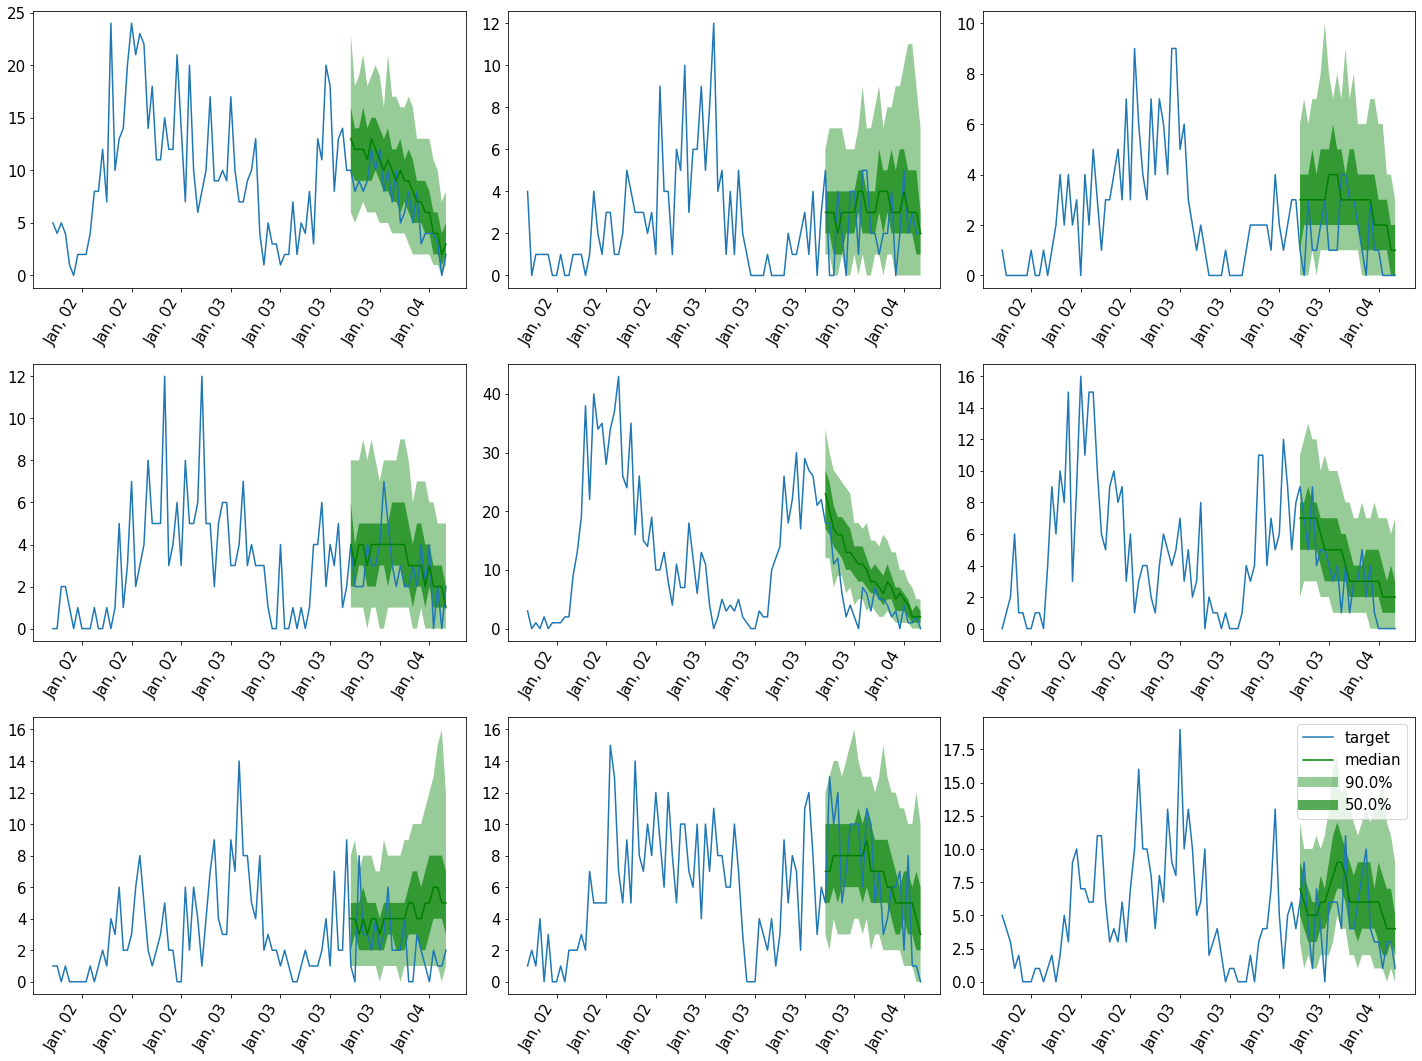

In [15]:
plt.figure(figsize=(20, 15))
date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx+1)

    plt.plot(ts[-4 * dataset.metadata.prediction_length:], label="target", )
    forecast.plot( color='g')
    plt.xticks(rotation=60)
    ax.xaxis.set_major_formatter(date_formater)

plt.gcf().tight_layout()
plt.legend()
plt.show()

In [16]:
metrics = pd.read_csv("lightning_logs/version_36/metrics.csv")

In [17]:
metrics

,train_perplexity,epoch,step,val_loss,train_loss
0,3.290567,0,49,NaN,NaN
1,4.232569,0,99,NaN,NaN
2,4.622893,0,149,NaN,NaN
3,5.048906,0,199,NaN,NaN
4,NaN,0,199,2.442793,NaN
...,...,...,...,...,...
295,100.008202,49,9899,NaN,NaN
296,96.974869,49,9949,NaN,NaN
297,102.819359,49,9999,NaN,NaN
298,NaN,49,9999,2.337303,NaN


Text(0, 0.5, 'perplexity')

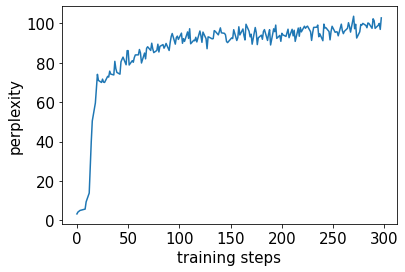

In [18]:
ax = metrics.train_perplexity.dropna().plot(kind="line")
ax.set_xlabel("training steps")
ax.set_ylabel("perplexity")

Text(0, 0.5, 'val neg. log likelihood')

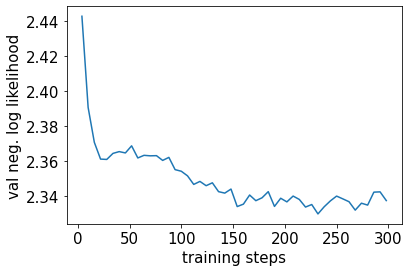

In [19]:
ax = metrics.val_loss.dropna().plot()
ax.set_xlabel("training steps")
ax.set_ylabel("val neg. log likelihood")

In [20]:
X = predictor.prediction_net.vq_vae.embed.cpu()

In [21]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)

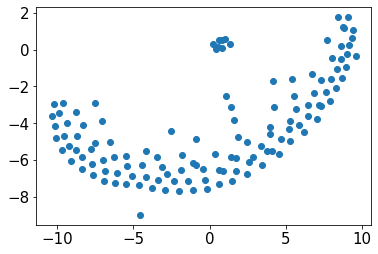

In [22]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha=1.0)